In [210]:
#  import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook


<Figure size 432x288 with 0 Axes>

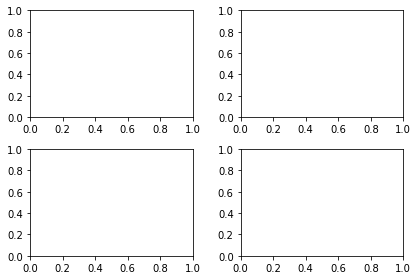

In [62]:
# Learning about the frames/ grids

fig = plt.figure()
fig.suptitle("No axes on this figure")

fig, ax_lst = plt.subplots(2, 2) # (2 rows, 2 columns)

fig.tight_layout() # this will fix the ovverlap or loose view
plt.show()

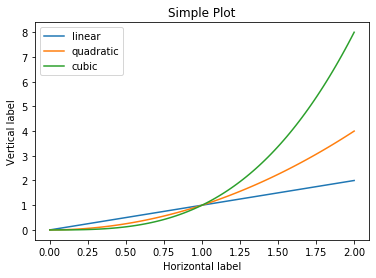

In [14]:
####### Simple plotting (this is done without setting fig to house everything)

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label = 'cubic')

plt.xlabel('Horizontal label')
plt.ylabel('Vertical label')

plt.title("Simple Plot")

plt.legend()

plt.show()

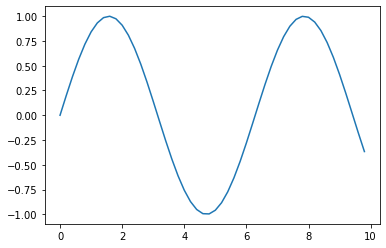

In [15]:
# Using fig to plot

x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

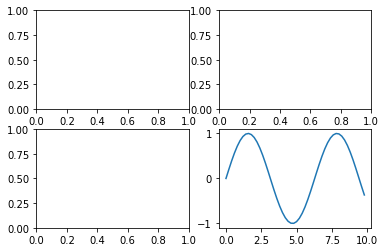

In [16]:
###### How to index fig grid

fig, ax = plt.subplots(2,2)

ax[1,1].plot(x, y)
plt.show()

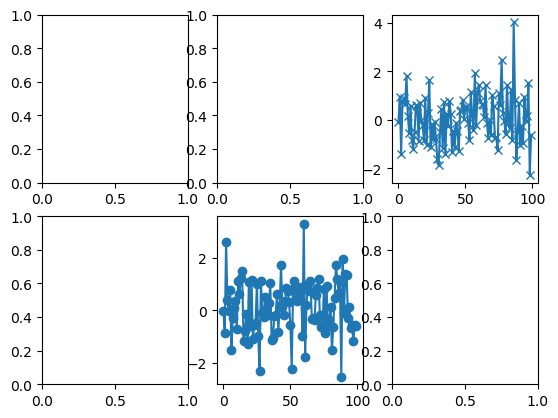

In [166]:
############## right style of coding

def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    
    Parameters
    ----------
    ax : Axes
        The axes to draw to
    data1 : array
        The x data
    data2 : array
        The y data
    param_dict : dict
        Dictionary of kwargs to pass to ax.plot
    
    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1 = range(0, 100)
data2, data3, data4 = np.random.randn(3, 100)

fig, ax = plt.subplots(2, 3)

my_plotter(ax[0,2], data1, data2, {'marker' : 'x'})
my_plotter(ax[1,1], data1, data3, {'marker' : 'o'})

plt.show()

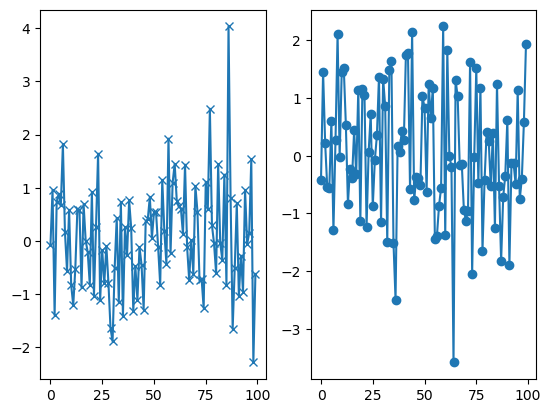

In [167]:
fig, (ax1, ax2) = plt.subplots(1,2)
my_plotter(ax1, data1, data2, {'marker' : 'x'})
my_plotter(ax2, data1, data4, {'marker' : 'o'})

plt.show()

Text(0.5, 0, 'index')

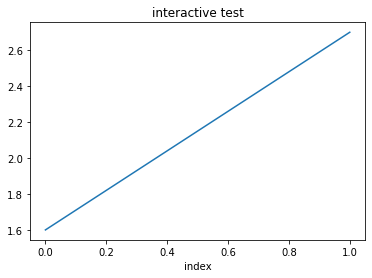

In [20]:
plt.ion()
plt.plot([1.6, 2.7])
plt.title("interactive test")
plt.xlabel("index")



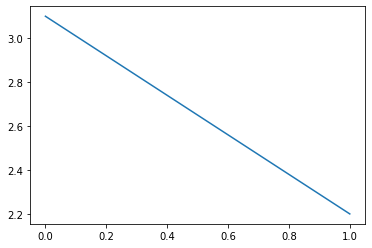

In [21]:
ax = plt.gca()
ax.plot([3.1, 2.2])

In [22]:
plt.draw()

<Figure size 432x288 with 0 Axes>

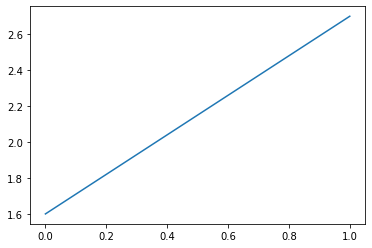

In [23]:
plt.ioff()
plt.plot([1.6, 2.7])

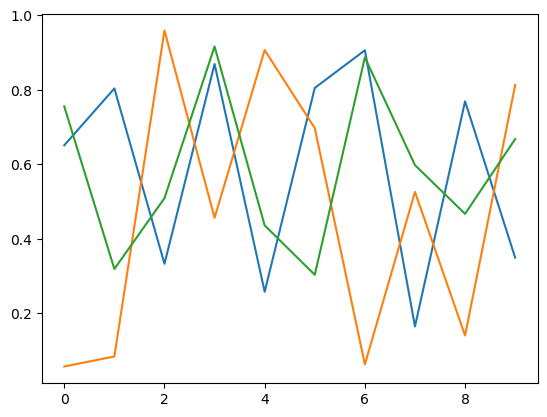

In [168]:
plt.ion()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.draw()


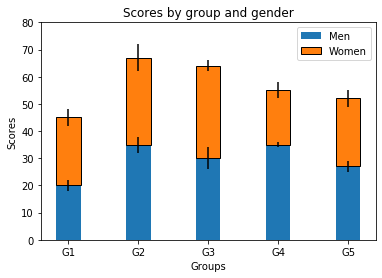

In [26]:
############# Stacked bar chart

N = 5

# Data
menMeans = (20, 35, 30, 35,27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

ind = np.arange(N)  # just getting a tuple of index based on N
width = 0.35 # Setting up how thick the bar is

# plotting here
p1 = plt.bar(ind, menMeans, width, yerr=menStd) #yerr is the weird tip
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd, edgecolor='black') #change bar part color by edgecolor or color

plt.ylabel('Scores')
plt.xlabel('Groups')
plt.title('Scores by group and gender')

plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5')) # re-label the x-axis
plt.yticks(np.arange(0, 81, 10)) # re-label the y axis, from 0-80, bin by 10
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

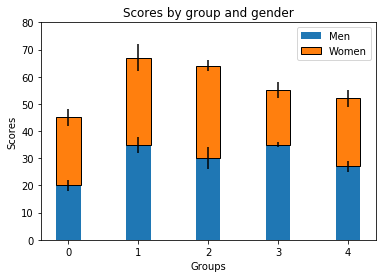

In [28]:
############# Stacked bar chart (in the suplots way)

N = 5

# Data input
menMeans = (20, 35, 30, 35,27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

# Getting an empty figure first
dig, ax = plt.subplots()
ind = np.arange(N)  # just getting a tuple of index based on N
width = 0.35 # Setting up how thick the bar is

# plotting here
p1 = ax.bar(ind, menMeans, width, yerr=menStd) #yerr is the weird tip
p2 = ax.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd, edgecolor='black') #change bar part color by edgecolor or color

ax.set_ylabel('Scores')
ax.set_xlabel('Groups')
ax.set_title('Scores by group and gender')

ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5')) # re-label the x-axis
ax.set_yticks(np.arange(0, 81, 10)) # re-label the y axis, from 0-80, bin by 10
ax.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

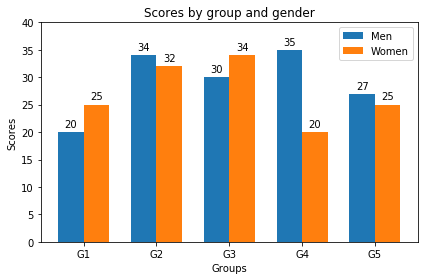

In [57]:
############### side by side bar chart

# defining labels
labels = ['G1', 'G2', 'G3', 'G4', 'G5']

# data
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels)) # the label locations and index
width = 0.35 # the width of the bars

fig, ax = plt.subplots() # BETTER PRACTICE FOR COMPLICATED GRAPHS

rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Groups')
ax.set_title('Scores by group and gender')

ax.set_xticks(x) # ***do this as a good practice
ax.set_yticks(np.arange(0, 45, 5)) # extend the y axis higher so that things don't overlap
ax.set_xticklabels(labels) # ***so that index and labels are separated

ax.legend() # show automatic legends

def autolabel(rects):
    """Attach a text label above each bar in *rects", displaying its height."""
    for rect in rects: # for each bars
        height = rect.get_height() # get the height location 
        ax.annotate('{}'.format(height), # used formatter to make extra labels easier
                    xy=(rect.get_x() + rect.get_width() / 2, height), # setting location of the label
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# use the labels
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()



Tom
0
10.003673039391197
--------------------
Duck
1
10.427508094125805
--------------------
Harry
2
10.092800106939182
--------------------
Slim
3
8.66745522467117
--------------------
Jim
4
12.777853328245762
--------------------


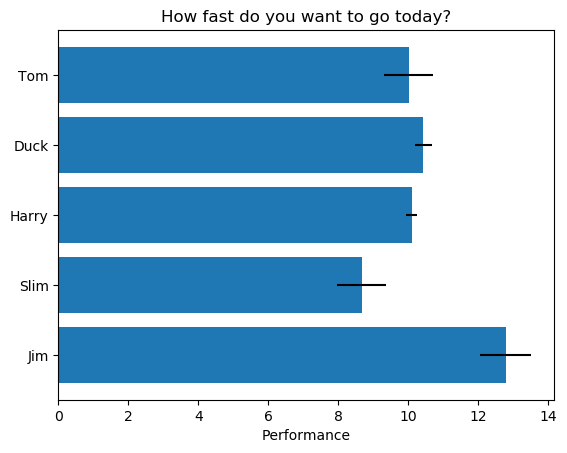

In [138]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Duck', 'Harry', 'Slim', 'Jim') # used as labels
y_pos = np.arange(len(people)) # returns 0, 1, 2, 3, 4 five outcomes
performance = 3 + 10 * np.random.rand(len(people)) # return a list of num

# using the same random state, but they're different
error = np.random.rand(len(people)) # error approximate

barsx = ax.barh(y_pos, performance, xerr=error, align='center') # plotting
# note: it can be ax.barh(people, performance...etc)
#       but it's going to be better style in code

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # this is dangerous
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Printing these out to check if the label matches the value

for i in range(5):
    print(people[i])
    print(y_pos[i])
    print(performance[i])
    print('-' * 20)
    
plt.show()

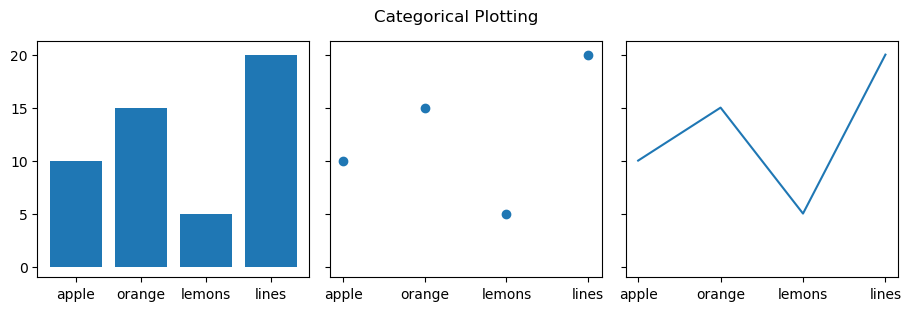

In [163]:
############ plotting categorical variables

data = {'apple' : 10, 'orange' : 15, 'lemons' : 5, 'lines' : 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, constrained_layout=True) # share y axis 
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

# plt.tight_layout()   # tight_layout() is not compatible to constrained_layout=True
plt.show()

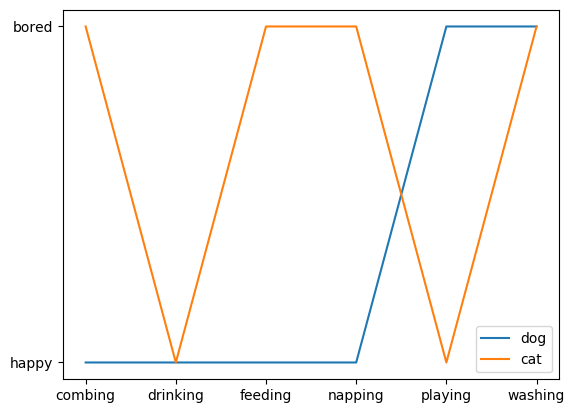

In [170]:
######## This is a demo from matplotlib, it's bad...

cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()

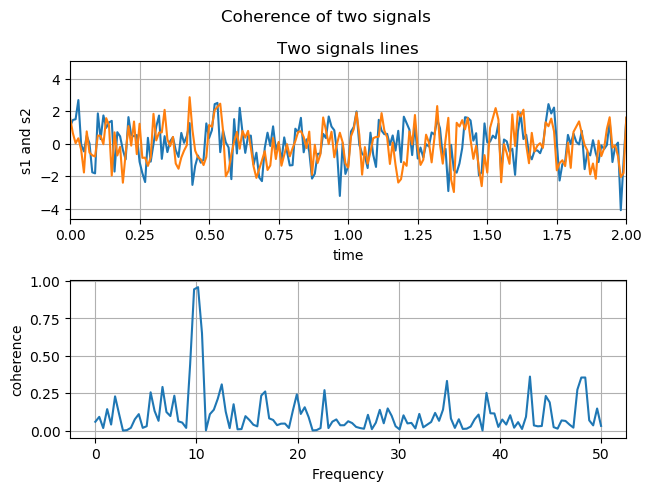

In [191]:
############ Coherence plot, need to know what Coherence is in mathematics

np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)

nse1 = np.random.randn(len(t)) # white noise 1
nse2 = np.random.randn(len(t)) # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.suptitle("Coherence of two signals")

axs[0].plot(t, s1, t, s2)
axs[0].set_title("Two signals lines")
axs[0].set_xlim(0, 2) # only show 0-2 instead of all the way of 0-30
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

xsy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')
# fig.tight_layout()
plt.show()

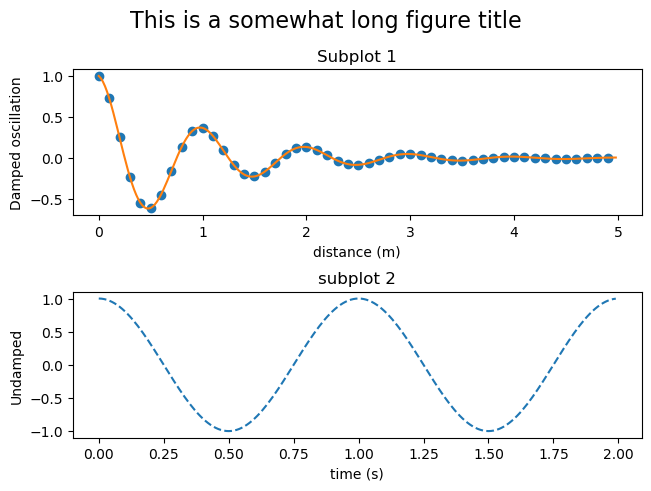

In [208]:
########## line graph styling

# Defining function to generate data

def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

# Calculations
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

# Set up to plot
fig, axs = plt.subplots(2, 1, constrained_layout=True) #use sharex=True to share x axis
axs[0].plot(t1, f(t1), 'o',t2, f(t2), '-') # **this can be used to replicate BW
axs[0].set_title('Subplot 1')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Damped oscillation')
fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(t3, np.cos(2*np.pi*t3), '--')
axs[1].set_xlabel('time (s)')
axs[1].set_title('subplot 2')
axs[1].set_ylabel('Undamped')




plt.show()



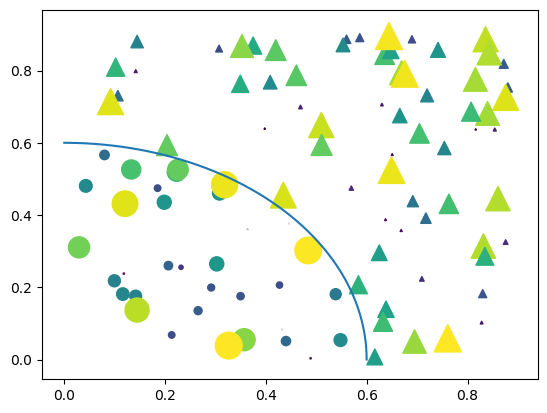

In [252]:
############# Learning dot pots

# Fixing random state for reproducibility
np.random.seed(19680801)

# Setting variables to generate data
N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2 # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y **2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)


plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)


# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))


plt.show()

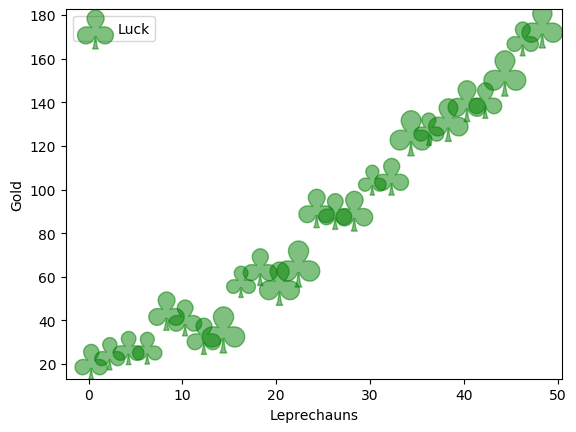

In [247]:
############## More dot graphs

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck") # s for size, alpha is transparancy
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')




plt.show()

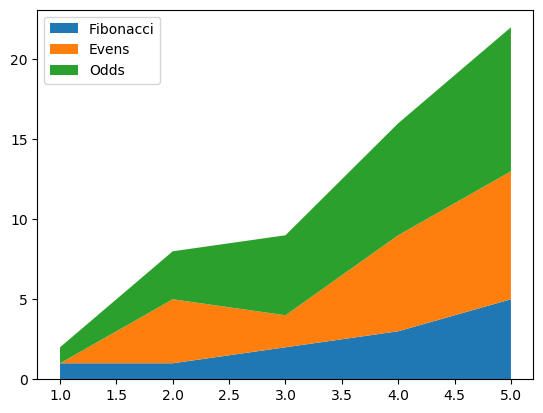

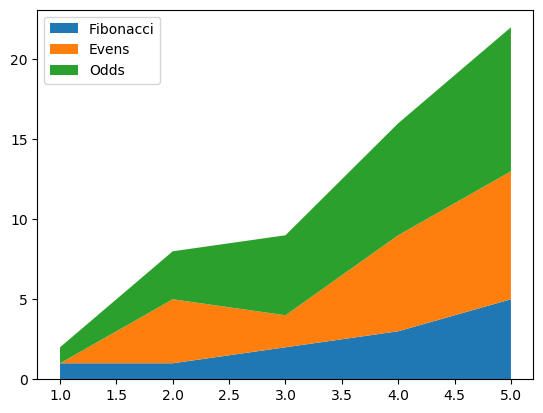

In [260]:
########### stacked area chart


# generate data
x = [1, 2, 3, 4, 5]   # Only one version of x

y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3]) # This is for method 2

labels = ["Fibonacci", "Evens", "Odds"]

# Method 1
fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

# Method 2
fig, ax = plt.subplots()
ax.stackplot(x, y, labels = labels)
ax.legend(loc='upper left')
plt.show()


# Method 1 is probably better for future changes and is more scalable

[None, None, None]

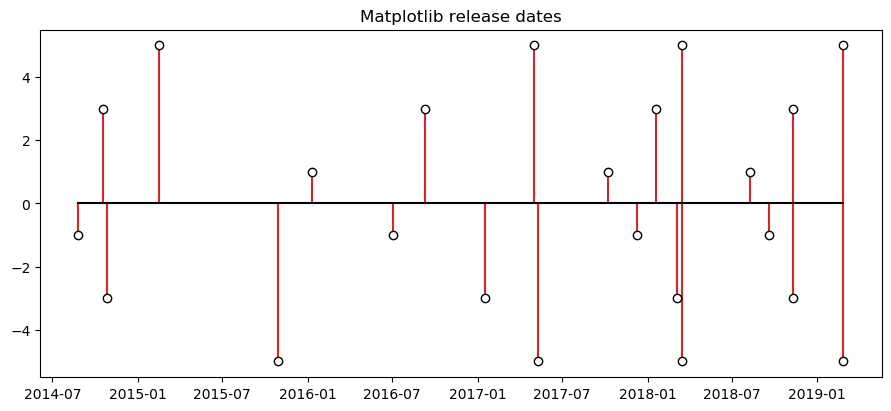

In [265]:
############ Drawing timeline

import matplotlib.dates as mdates
from datetime import datetime

try:
    
    import urllib.request
    import jdson
    
    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())
    
    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    
    # In case the above fails, e.g. because of missing internet connection
    # use the following list as a fallback
    
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']
    
    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']
             
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
             
             
# Choose some nice levels

levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
plt.setp(markerline, mec = "k", mfc="w", zorder=3)

# 

In [267]:
for i in levels: print(i)


-5
5
-3
3
-1
1
-5
5
-3
3
-1
1
-5
5
-3
3
-1
1
-5
5
-3
3
-1


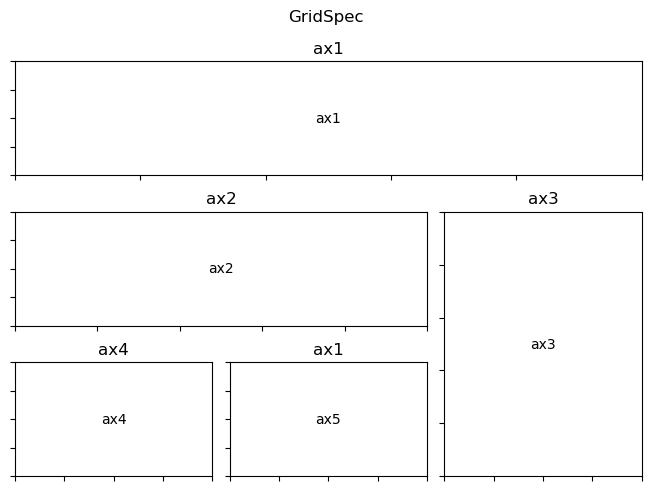

In [281]:
######### Grid Management

from matplotlib.gridspec import GridSpec

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
        
fig = plt.figure(constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax1.set_title("ax1")
# Identical to ax1 = plt.subplot(gs.new_subplotspec(0, 0), colspan=3)
ax2 = fig.add_subplot(gs[1, :-1])
ax2.set_title("ax2")
ax3 = fig.add_subplot(gs[1:, -1])
ax3.set_title("ax3")
ax4 = fig.add_subplot(gs[-1, 0])
ax4.set_title("ax4")
ax5 = fig.add_subplot(gs[-1, -2])
ax5.set_title("ax1")

fig.suptitle("GridSpec")
format_axes(fig)
plt.show()